# https://chembl.gitbook.io/chembl-interface-documentation/downloads
# https://www.learnpythonwithrune.org/how-to-use-sqlite-database-with-pandas/

In [1]:
import sqlite3
import pandas as pd
import numpy as np
#data file path

path="./"#For the output files
target="MMP"#Will be used to give a name to the csv files  
conn = sqlite3.connect('path to database/chembl_33.db')


In [2]:
cur=conn.cursor()
cur1=conn.cursor()
cur2=conn.cursor()
cur3=conn.cursor()
cur4=conn.cursor()
cur5=conn.cursor()
cur6=conn.cursor()
cur7=conn.cursor()
cur8=conn.cursor()
cur9=conn.cursor()


# List of the tables

In [3]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('action_type',), ('assay_type',), ('chembl_id_lookup',), ('confidence_score_lookup',), ('curation_lookup',), ('chembl_release',), ('source',), ('relationship_type',), ('target_type',), ('variant_sequences',), ('bioassay_ontology',), ('data_validity_lookup',), ('activity_smid',), ('activity_stds_lookup',), ('assay_classification',), ('atc_classification',), ('bio_component_sequences',), ('component_sequences',), ('protein_classification',), ('domains',), ('go_classification',), ('structural_alert_sets',), ('products',), ('frac_classification',), ('hrac_classification',), ('irac_classification',), ('research_stem',), ('organism_class',), ('patent_use_codes',), ('usan_stems',), ('version',), ('cell_dictionary',), ('docs',), ('target_dictionary',), ('tissue_dictionary',), ('molecule_dictionary',), ('activity_supp',), ('component_class',), ('component_domains',), ('component_go',), ('component_synonyms',), ('structural_alerts',), ('defined_daily_dose',), ('product_patents',), ('protein_cl

# Looking at the most important tables

In [4]:
cur1.execute('SELECT * from activities')#molregno, assay_id
cur2.execute('SELECT * from assays')#tid,assay_id, confidence_score, assay_type
cur3.execute('SELECT * from activity_properties')
cur4.execute('SELECT * from compound_structures')#molregno
cur5.execute('SELECT * from target_dictionary')#tid
cur6.execute('SELECT * from binding_sites')#tid
cur7.execute('SELECT * from component_sequences')#component_id
cur8.execute('SELECT * from variant_sequences')#accession
cur9.execute('SELECT * from target_components')#tid, component_id



In [5]:
names = list(map(lambda x: x[0], cur1.description))

print(names)

['activity_id', 'assay_id', 'doc_id', 'record_id', 'molregno', 'standard_relation', 'standard_value', 'standard_units', 'standard_flag', 'standard_type', 'activity_comment', 'data_validity_comment', 'potential_duplicate', 'pchembl_value', 'bao_endpoint', 'uo_units', 'qudt_units', 'toid', 'upper_value', 'standard_upper_value', 'src_id', 'type', 'relation', 'value', 'units', 'text_value', 'standard_text_value', 'action_type']


In [6]:
names = [description[0] for description in cur1.description]
print(names)

['activity_id', 'assay_id', 'doc_id', 'record_id', 'molregno', 'standard_relation', 'standard_value', 'standard_units', 'standard_flag', 'standard_type', 'activity_comment', 'data_validity_comment', 'potential_duplicate', 'pchembl_value', 'bao_endpoint', 'uo_units', 'qudt_units', 'toid', 'upper_value', 'standard_upper_value', 'src_id', 'type', 'relation', 'value', 'units', 'text_value', 'standard_text_value', 'action_type']


In [7]:
names = [description[0] for description in cur2.description]
print(names)

['assay_id', 'doc_id', 'description', 'assay_type', 'assay_test_type', 'assay_category', 'assay_organism', 'assay_tax_id', 'assay_strain', 'assay_tissue', 'assay_cell_type', 'assay_subcellular_fraction', 'tid', 'relationship_type', 'confidence_score', 'curated_by', 'src_id', 'src_assay_id', 'chembl_id', 'cell_id', 'bao_format', 'tissue_id', 'variant_id', 'aidx']


In [8]:
names = [description[0] for description in cur3.description]
print(names)

['ap_id', 'activity_id', 'type', 'relation', 'value', 'units', 'text_value', 'standard_type', 'standard_relation', 'standard_value', 'standard_units', 'standard_text_value', 'comments', 'result_flag']


In [9]:
names = [description[0] for description in cur4.description]
print(names)

['molregno', 'molfile', 'standard_inchi', 'standard_inchi_key', 'canonical_smiles']


In [10]:
names = [description[0] for description in cur5.description]
print(names)

['tid', 'target_type', 'pref_name', 'tax_id', 'organism', 'chembl_id', 'species_group_flag']


In [11]:
names = [description[0] for description in cur6.description]
print(names)

['site_id', 'site_name', 'tid']


In [12]:
names = [description[0] for description in cur7.description]
print(names)

['component_id', 'component_type', 'accession', 'sequence', 'sequence_md5sum', 'description', 'tax_id', 'organism', 'db_source', 'db_version']


In [13]:
names = [description[0] for description in cur8.description]
print(names)

['variant_id', 'mutation', 'accession', 'version', 'isoform', 'sequence', 'organism', 'tax_id']


In [14]:
names = [description[0] for description in cur9.description]
print(names)

['tid', 'component_id', 'targcomp_id', 'homologue']


In [15]:
m=1
print (cur1.fetchmany(m),"activities")
print (cur2.fetchmany(m), "assays")
print (cur3.fetchmany(m),"activity_properties")
print (cur4.fetchmany(m), "compound_structures")
print (cur5.fetchmany(m), "target_dictionary")
print (cur6.fetchmany(m), "binding_sites")
print (cur7.fetchmany(m),"component_sequences")
print (cur8.fetchmany(m), "variant_sequences")
print (cur9.fetchmany(m), "target_components")


[(31863, 54505, 6424, 206172, 180094, '>', 100000, 'nM', 1, 'IC50', None, None, 0, None, 'BAO_0000190', 'UO_0000065', 'http://www.openphacts.org/units/Nanomolar', None, None, None, 1, 'IC50', '>', 100, 'uM', None, None, None)] activities
[(1, 11087, 'The compound was tested for the in vitro inhibition of platelet 12-lipoxygenase at a concentration of 30 uM', 'B', None, None, None, None, None, None, None, None, 12052, 'H', 8, 'Autocuration', 1, None, 'CHEMBL615117', None, 'BAO_0000019', None, None, 'CLD0')] assays
[(1, 17126237, 'DATASET', None, None, None, 'Hematology', 'DATASET', None, None, None, 'Hematology', None, 0)] activity_properties
[(1, '\n     RDKit          2D\n\n 24 26  0  0  0  0  0  0  0  0999 V2000\n    5.2792   -2.0500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    5.7917   -2.3500    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    5.2792   -1.4500    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    6.3125   -2.0500    0.0000 N   0  0  0  0  0  0  0  0  0  

In [16]:
print(cur1.fetchone())

(31864, 83907, 6432, 208970, 182268, '=', 2500, 'nM', 1, 'IC50', None, None, 1, 5.6, 'BAO_0000190', 'UO_0000065', 'http://www.openphacts.org/units/Nanomolar', None, None, None, 1, 'IC50', '=', 2.5, 'uM', None, None, None)


In [17]:
#print(cur1.fetchall())

In [18]:
n=0
for row in cur.execute('SELECT * FROM activities'):
    n=n+1
    if n < 5:
        print(row)

(31863, 54505, 6424, 206172, 180094, '>', 100000, 'nM', 1, 'IC50', None, None, 0, None, 'BAO_0000190', 'UO_0000065', 'http://www.openphacts.org/units/Nanomolar', None, None, None, 1, 'IC50', '>', 100, 'uM', None, None, None)
(31864, 83907, 6432, 208970, 182268, '=', 2500, 'nM', 1, 'IC50', None, None, 1, 5.6, 'BAO_0000190', 'UO_0000065', 'http://www.openphacts.org/units/Nanomolar', None, None, None, 1, 'IC50', '=', 2.5, 'uM', None, None, None)
(31865, 88152, 6432, 208970, 182268, '>', 50000, 'nM', 1, 'IC50', None, None, 0, None, 'BAO_0000190', 'UO_0000065', 'http://www.openphacts.org/units/Nanomolar', None, None, None, 1, 'IC50', '>', 50, 'uM', None, None, None)
(31866, 83907, 6432, 208987, 182855, '=', 9000, 'nM', 1, 'IC50', None, None, 1, 5.05, 'BAO_0000190', 'UO_0000065', 'http://www.openphacts.org/units/Nanomolar', None, None, None, 1, 'IC50', '=', 9, 'uM', None, None, None)


# The most important part: The query

Change this line according to your target name:
t.pref_name LIKE '%YOUR_TARGET_QUERY%' 

In [19]:
#https://chembl.gitbook.io/chembl-interface-documentation/frequently-asked-questions/chembl-data-questions

#at.confidence_score = '9' AND at.assay_type = 'B'  
#For betalactamase case adding "F" will increase the number of the cases by 10 times
#B:Binding (B) - Data measuring binding of compound to a molecular target, e.g. Ki, IC50, Kd.
#9: Direct single protein target assigned 
 
  
    
# Query for LEFT JOIN
sql1 = '''SELECT c.molregno, c.canonical_smiles as SMILES, ac.standard_type, ac.standard_relation, ac.standard_value as activity,  
at.assay_id, at.confidence_score, at.assay_type, at.tid, t.tid, t.chembl_id as Target_ChEMBL_ID, ac.pchembl_value as pchembl,
cs.sequence, vs.mutation, t.organism, ac.data_validity_comment
FROM activities as ac
LEFT JOIN compound_structures as c ON  c.molregno=ac.molregno
LEFT JOIN assays as at ON at.assay_id=ac.assay_id
LEFT JOIN target_dictionary as t ON t.tid=at.tid
LEFT JOIN target_components as tc ON t.tid=tc.tid
LEFT JOIN component_sequences as cs ON cs.component_id=tc.component_id
LEFT JOIN variant_sequences as vs ON vs.accession=cs.accession
WHERE (
at.confidence_score = '9' AND at.assay_type = 'B' AND
ac.standard_units="nM" AND
ac.src_id=1 AND

(ac.standard_type="IC50" OR ac.standard_type="EC50" OR ac.standard_type="Ki" OR
ac.standard_type="XC50" OR ac.standard_type="AC50" OR ac.standard_type="Potency") AND

ac.standard_value is NOT NULL AND

(ac.standard_relation="=" OR (ac.standard_relation=">"AND ac.standard_value>100000) OR (ac.standard_relation="<"AND ac.standard_value<50000)) AND

t.pref_name LIKE '%metalloproteinase%' 

AND
(ac.data_validity_comment Is NULL OR ac.data_validity_comment="Manually validated")

)
;'''

#(ac.standard_relation!=">") AND
#(ac.standard_type="IC50" OR ac.standard_type="EC50" OR ac.standard_type="Ki" OR ac.standard_type="Kd" OR
#ac.standard_type="XC50" OR ac.standard_type="AC50" OR ac.standard_type="Potency") AND

#vs.mutation is NULL AND
#AND t.organism = "Staphylococcus aureus"
#AND ac.pchembl_value!="Null" 
#ac.src_id=1 pubchem

# Executing the query
cur.execute(sql1)


# Fetching rows from the result table
result2 = cur.fetchall()
print ("Number of data points= ",len(result2))
length=len(result2[0])

print ("Number of retrieved coloumns= ",length)
n=0
for row in result2:
    n=n+1
    if n < 10:
        #print(row[length-1])
        print (row)
    

Number of data points=  8492
Number of retrieved coloumns=  16
(140132, 'CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CCCOCc1ccccc1)CC(=O)NO', 'Ki', '<', 1, 49517, 9, 'B', 11110, 11110, 'CHEMBL4588', None, 'MFSLKTLPFLLLLHVQISKAFPVSSKEKNTKTVQDYLEKFYQLPSNQYQSTRKNGTNVIVEKLKEMQRFFGLNVTGKPNEETLDMMKKPRCGVPDSGGFMLTPGNPKWERTNLTYRIRNYTPQLSEAEVERAIKDAFELWSVASPLIFTRISQGEADINIAFYQRDHGDNSPFDGPNGILAHAFQPGQGIGGDAHFDAEETWTNTSANYNLFLVAAHEFGHSLGLAHSSDPGALMYPNYAFRETSNYSLPQDDIDGIQAIYGLSSNPIQPTGPSTPKPCDPSLTFDAITTLRGEILFFKDRYFWRRHPQLQRVEMNFISLFWPSLPTGIQAAYEDFDRDLIFLFKGNQYWALSGYDILQGYPKDISNYGFPSSVQAIDAAVFYRSKTYFFVNDQFWRYDNQRQFMEPGYPKSISGAFPGIESKVDAVFQQEHFFHVFSGPRYYAFDLIAQRVTRVARGNKWLNCRYG', None, 'Homo sapiens', None)
(139499, 'CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CCCCCOCc1ccccc1)CC(=O)NO', 'Ki', '=', 2, 49517, 9, 'B', 11110, 11110, 'CHEMBL4588', 8.7, 'MFSLKTLPFLLLLHVQISKAFPVSSKEKNTKTVQDYLEKFYQLPSNQYQSTRKNGTNVIVEKLKEMQRFFGLNVTGKPNEETLDMMKKPRCGVPDSGGFMLTPGNPKWERTNLTYRIRNYTPQLSEAEVERAIKDAFELWSVASPLIFTRISQGEADINIAFYQRDHGDN

# Processing the data for classification

In [20]:

df = pd.read_sql(sql1, conn)
df = pd.read_sql(sql1, conn)
df["pactivity"] = -1*np.log10(df["activity"]/1000000000)#-log Molar same as the pchembl

#print (df.head())

#activity threshould for classification
activity_threshould=6.5

#
df = df.drop(df[((df.standard_relation == ">") | (df.standard_relation == ">=")) & (df["pactivity"] < activity_threshould)].index)
df = df.drop(df[((df.standard_relation == "<") | (df.standard_relation == "<=")) & (df["pactivity"] > activity_threshould)].index)


# add a cat column
df["activity_cat"] = pd.cut(
    x=df["pactivity"],
    bins=[1/np.inf,activity_threshould,np.inf],
    labels=[0,1],
)

#restart the index to avoid raising error in the following step for dropped indexes
df=df.reset_index()



# Checking class of the duplicates
Dealing with duplicates, part: 1

In [25]:
df.to_csv(path+target+"_0.csv")
df = pd.read_csv(path+target+"_0.csv")
#Extarction data for only two ChEMBL ID to decrease the processing time for simulation purposes
df = (df[(df.Target_ChEMBL_ID == "CHEMBL283") | (df.Target_ChEMBL_ID == "CHEMBL3869")])


bad_duplicates=[]
good_duplicates=[]
length1=len (df["molregno"])
print(length1)

for i in range (0, length1):
    
    for j in range (0, length1):
        if (df["molregno"][i] == df["molregno"][j]) and (df["Target_ChEMBL_ID"][i] == df["Target_ChEMBL_ID"][j]):
            
            
            if (i%100==0 and j%100==0):
                print (i,j)
            #If it changes the categeory it has to be removed
            if df["activity_cat"][i] != df["activity_cat"][j]or ((abs((df["pactivity"][i]) - (df["pactivity"][j])) > 3)): 
                
                #print (df["molregno"][i],i,j,bad_duplicates,df["activity_cat"][i],df["activity_cat"][j])
                if i not in bad_duplicates:
                    bad_duplicates.append(i)
                     
            
                
print (bad_duplicates)
df.to_csv(path+target+"_1.csv")
df = df.drop(bad_duplicates)
df.to_csv(path+target+"_2_6.5.csv")


1346
0 0
100 100
200 200
300 300
400 400
500 500
600 600
700 700
800 800
900 900
1000 1000
1100 1100
1200 1200
1300 1300
[0, 37, 43, 162, 176, 189, 197, 204, 215, 242, 366, 367, 410, 433, 434, 478, 516, 558, 932, 1136, 1137, 1286, 1287, 1291, 1318, 1339]


# Dealing with the duplicates, part: 2

In [26]:
df = pd.read_csv(path+target+"_2_6.5.csv")

duplicates=df.duplicated(subset=['molregno',"Target_ChEMBL_ID"])
print (duplicates.value_counts())

#To just keep one row of each good_duplicates
print (df.activity_cat.value_counts())
df=df.drop_duplicates(subset=['molregno',"Target_ChEMBL_ID"],keep="first")
print (df.activity_cat.value_counts())
#print (df.activity_cat.value_counts().active)
#print (df.standard_relation.value_counts())
df.to_csv(path+target+"_3_6.5.csv")


False    1205
True      115
dtype: int64
0    709
1    611
Name: activity_cat, dtype: int64
0    673
1    532
Name: activity_cat, dtype: int64


In [27]:
df = pd.read_csv(path+target+"_3_6.5.csv")

In [28]:
df=df[["molregno", "SMILES", "Target_ChEMBL_ID","pactivity", "activity_cat", "sequence"]]
df.to_csv(path+target+"_4_6.5.csv")
df.head()

,molregno,SMILES,Target_ChEMBL_ID,pactivity,activity_cat,sequence
0,68875,CC(C)CN([C@@H](CCSCc1ccccc1)C(=O)NO)S(=O)(=O)c...,CHEMBL283,7.045757,1,MKSLPILLLLCVAVCSAYPLDGAARGEDTSMNLVQKYLENYYDLKK...
1,453588,COc1ccc(S(=O)(=O)N(Cc2cccnc2)[C@@H](C(=O)NO)C(...,CHEMBL283,7.853872,1,MKSLPILLLLCVAVCSAYPLDGAARGEDTSMNLVQKYLENYYDLKK...
2,68872,COc1ccc(S(=O)(=O)N(CC(=O)NC(c2ccccc2)c2ccccc2)...,CHEMBL283,8.431798,1,MKSLPILLLLCVAVCSAYPLDGAARGEDTSMNLVQKYLENYYDLKK...
3,68707,COc1ccc(S(=O)(=O)N(CC(C)C)[C@@H](CCSCc2ccc(-c3...,CHEMBL283,7.698970,1,MKSLPILLLLCVAVCSAYPLDGAARGEDTSMNLVQKYLENYYDLKK...
4,68326,COc1ccc(S(=O)(=O)N(CC(C)C)[C@@H](CCSCc2ccccc2)...,CHEMBL283,9.154902,1,MKSLPILLLLCVAVCSAYPLDGAARGEDTSMNLVQKYLENYYDLKK...


In [29]:
print(df[ "Target_ChEMBL_ID"].value_counts())

CHEMBL283     708
CHEMBL3869    497
Name: Target_ChEMBL_ID, dtype: int64


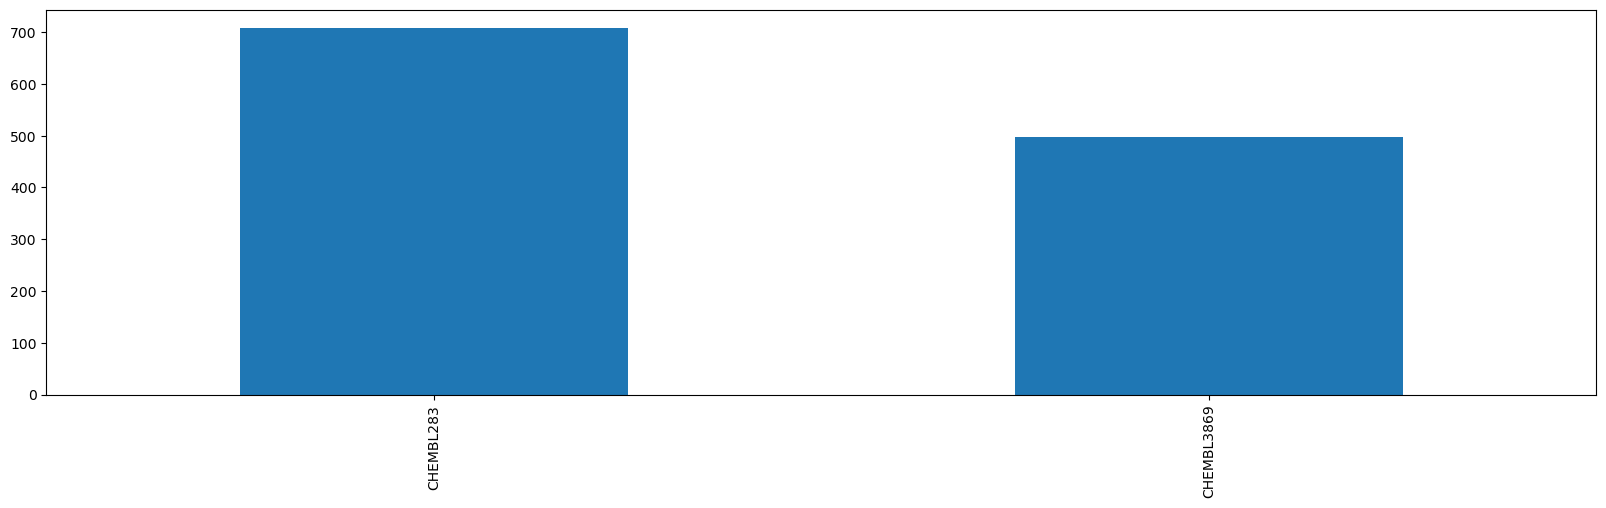

In [30]:
df["Target_ChEMBL_ID"].value_counts().plot(kind="bar",figsize=(20,5));

In [31]:
selection1=(df[(df.Target_ChEMBL_ID == "CHEMBL3869")])

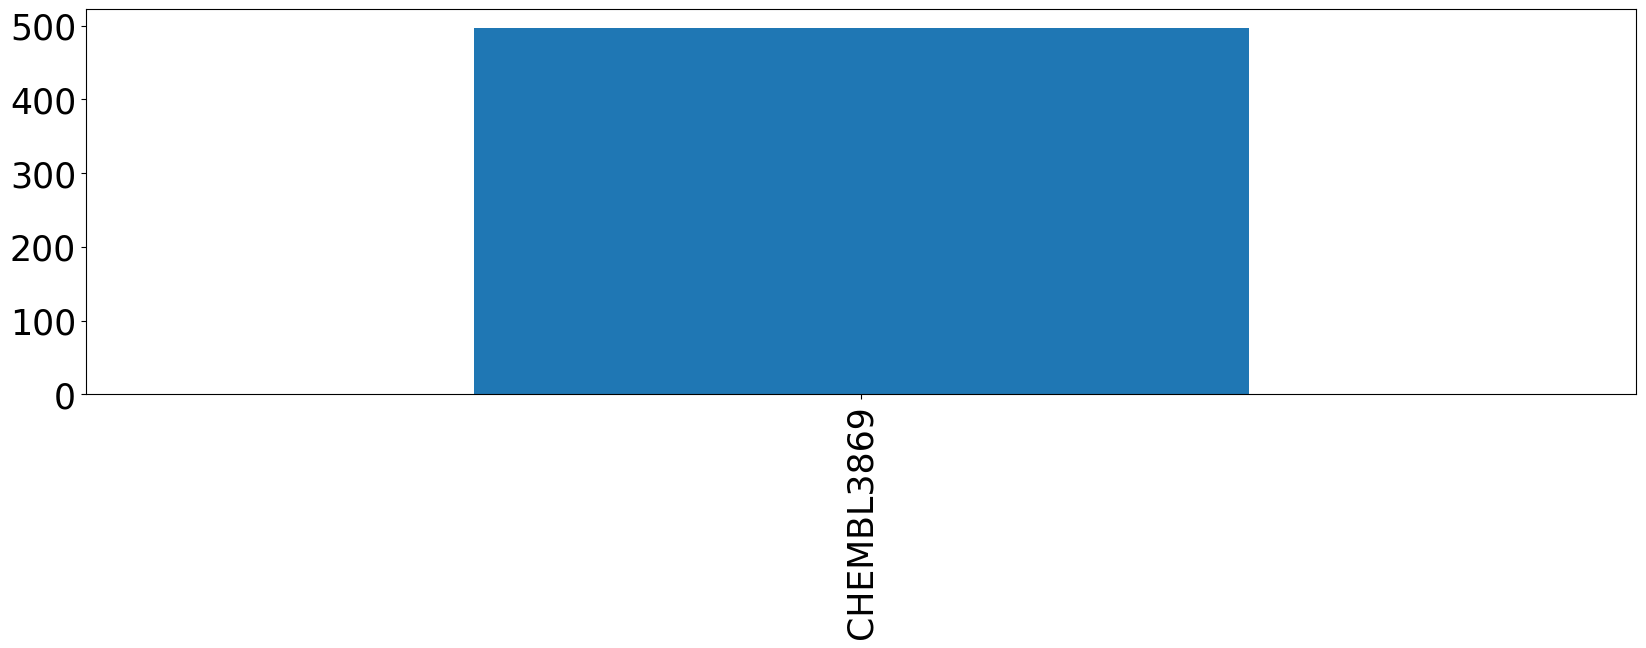

In [32]:
selection1["Target_ChEMBL_ID"].value_counts().plot(kind="bar",figsize=(20,5),fontsize=(25));

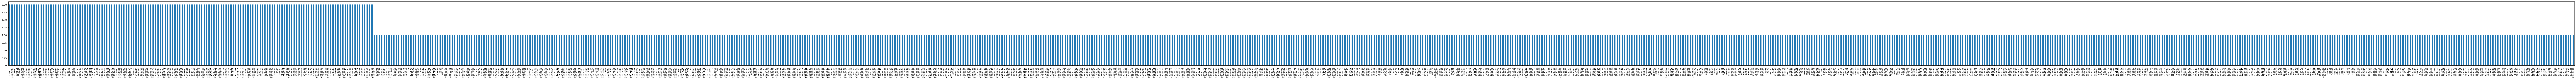

In [33]:
df[ "molregno"].value_counts().plot(kind="bar",figsize=(200,5));

In [34]:
#You can commit/save this by merely calling the commit() method of the Connection object you created.
#conn.commit()

In [35]:
# Closing the DB connection
conn.close()